# after_stat
计算统计量后评估映射

`geom_bar`使用`stat_count`，默认情况下，它将`y`值映射到`count`，即在一个位置上观察到的数量。

In [1]:
import pandas as pd

from plotnine import ggplot, aes, after_stat, geom_bar, labs

-    PANEL  count  group      prop  width  x  y
0      1      1     -1  0.066667    0.9  1  1
1      1      2     -1  0.133333    0.9  2  2
2      1      3     -1  0.200000    0.9  3  3
3      1      4     -1  0.266667    0.9  4  4
4      1      5     -1  0.333333    0.9  5  5


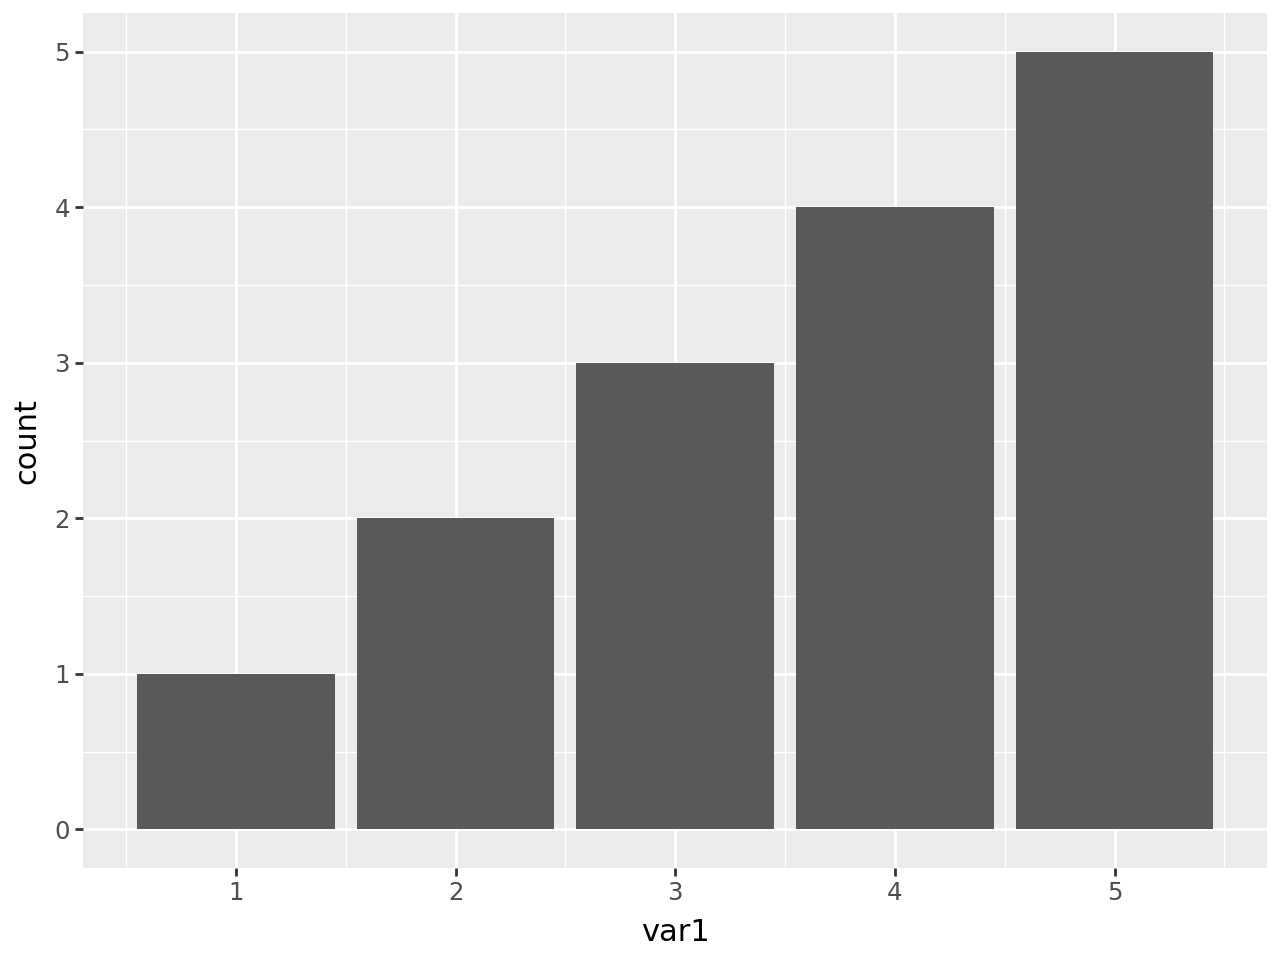

In [2]:
df = pd.DataFrame({
    "var1": [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
})

(
    ggplot(df, aes("var1"))
    + geom_bar()
)

使用`after_stat`函数，我们可以映射到道具，这是面板中点在一个位置上的比例。

-    PANEL  count  group      prop  width  x         y
0      1      1     -1  0.066667    0.9  1  0.066667
1      1      2     -1  0.133333    0.9  2  0.133333
2      1      3     -1  0.200000    0.9  3  0.200000
3      1      4     -1  0.266667    0.9  4  0.266667
4      1      5     -1  0.333333    0.9  5  0.333333


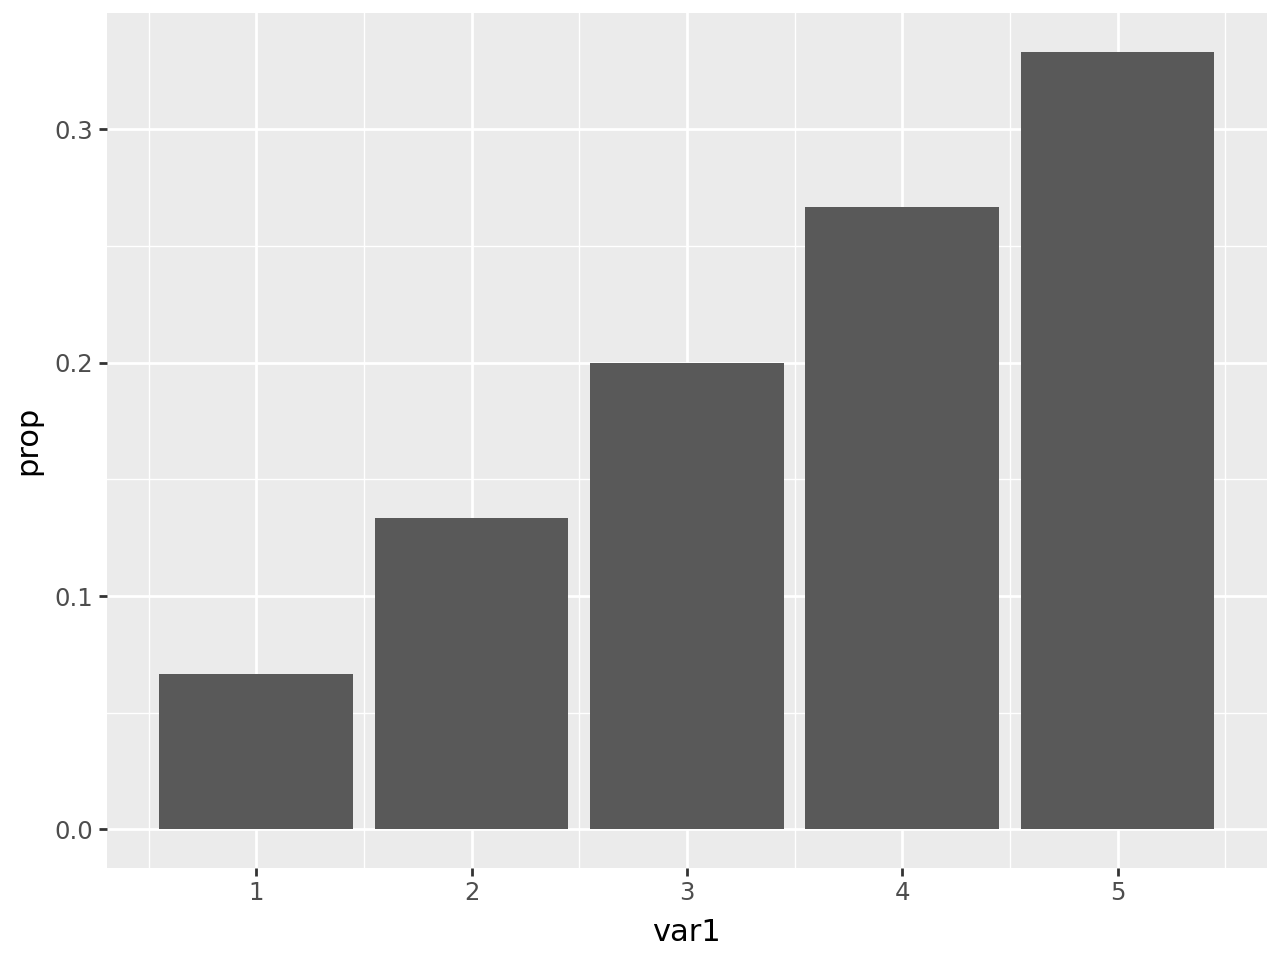

In [3]:
(
    ggplot(df, aes("var1"))
    + geom_bar(aes(y=after_stat("prop")))  # default is after_stat('count')
)

通过`after_stat`，您可以在表达式中使用由`stat`计算的变量。例如，我们使用`count`来计算道具。

-    PANEL  count  group      prop  width  x         y
0      1      1     -1  0.066667    0.9  1  0.066667
1      1      2     -1  0.133333    0.9  2  0.133333
2      1      3     -1  0.200000    0.9  3  0.200000
3      1      4     -1  0.266667    0.9  4  0.266667
4      1      5     -1  0.333333    0.9  5  0.333333


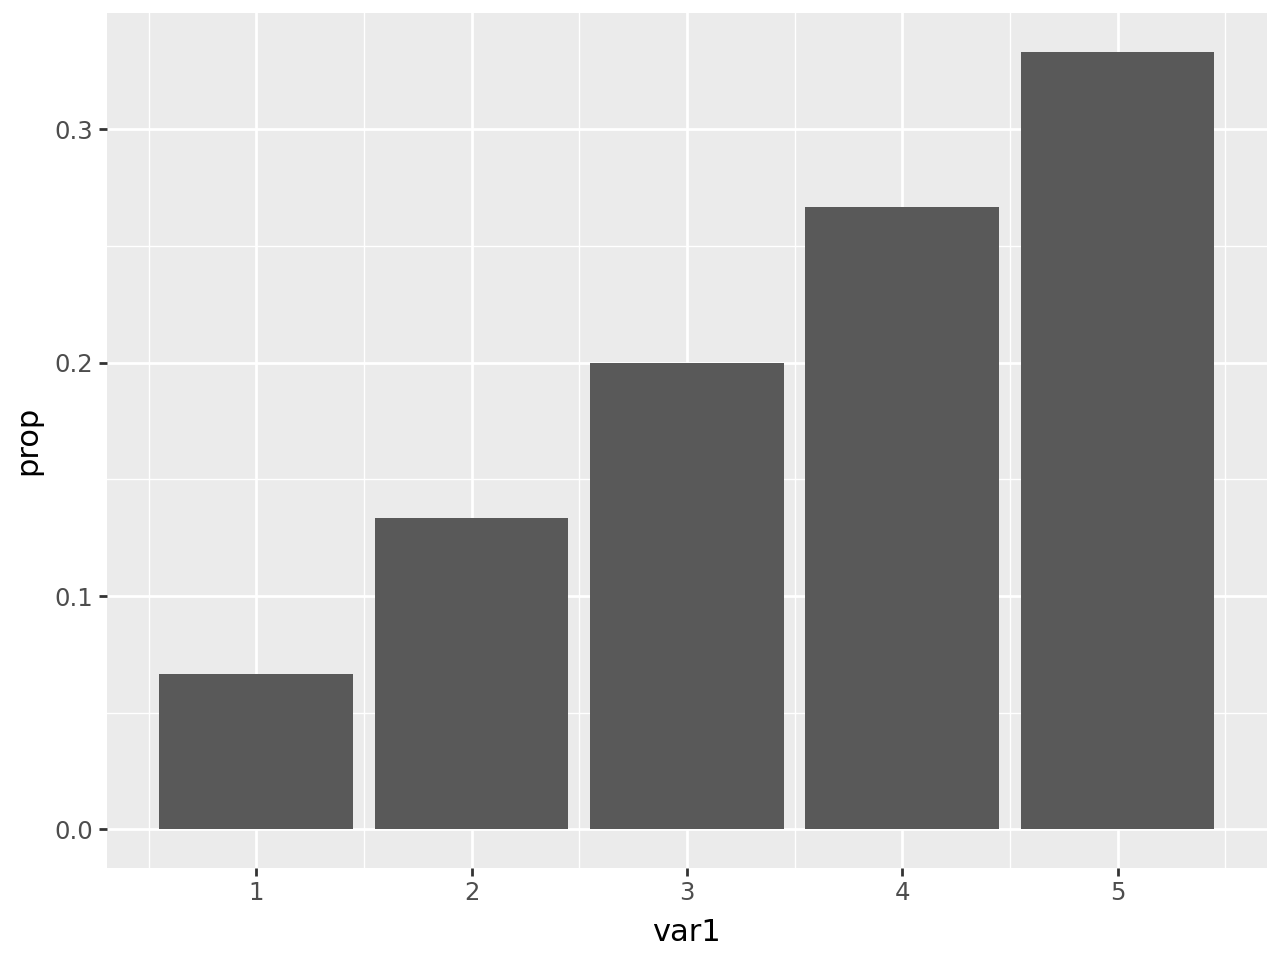

In [4]:
import numpy as np
(
    ggplot(df, aes("var1"))
    + geom_bar(aes(y=after_stat("count / np.sum(count)")))
    + labs(y="prop")
)